In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import json
import geopandas as gpd

from shapely.geometry import Point, MultiPoint
from shapely.geometry.polygon import Polygon
from tqdm import tqdm, tqdm_notebook

In [2]:
tqdm_notebook().pandas()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [3]:
point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [4]:
bounds=gpd.read_file('./data/de_kreise_sehrhoch.geojson')
type(bounds)

geopandas.geodataframe.GeoDataFrame

In [6]:
bounds.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,geometry
0,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,244,Oldenburg,None,None,Landkreise,Rural district,"POLYGON ((8.65348 53.11003, 8.66599 53.10659, ..."
1,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,245,Osnabrück Städte,None,None,Kreisfreie Städte,Urban district,"POLYGON ((7.96379 52.32545, 7.96960 52.32937, ..."
2,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,246,Osnabrück,None,None,Landkreise,Rural district,"POLYGON ((8.02655 52.68435, 8.03910 52.67371, ..."
3,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,247,Vechta,None,None,Landkreise,Rural district,"POLYGON ((8.46214 52.80015, 8.45627 52.79629, ..."
4,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,248,Wesermarsch,None,None,Landkreise,Rural district,"MULTIPOLYGON (((8.30750 53.61819, 8.30750 53.6..."


In [5]:
rn=gpd.read_file('./data/radon222_boden.json')
type(rn)

geopandas.geodataframe.GeoDataFrame

In [7]:
rn.head()

,id,descript,geo_unit,rn_max,geometry
0,radon222_boden.1,AV192,Tertiär,29.1,"MULTIPOLYGON (((7.81099 49.93957, 7.81099 49.9..."
1,radon222_boden.2,AV194,Rotliegend,36.4,"MULTIPOLYGON (((7.81099 49.88560, 7.81099 49.9..."
2,radon222_boden.3,AV218,Buntsandstein,22.0,"MULTIPOLYGON (((7.81099 49.23809, 7.81099 49.2..."
3,radon222_boden.4,AV245,Quartär,76.1,"MULTIPOLYGON (((7.81099 48.50964, 7.81099 48.5..."
4,radon222_boden.5,AV246,Quartär,77.3,"MULTIPOLYGON (((7.81099 48.48266, 7.81099 48.5..."


In [8]:
test=pd.DataFrame(bounds.iloc[0]).T
test

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,geometry
0,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,244,Oldenburg,None,None,Landkreise,Rural district,"POLYGON ((8.65347957611084 53.11003112792969, ..."


In [9]:
type(rn['geometry'][0])

shapely.geometry.multipolygon.MultiPolygon

In [10]:
type(rn['geometry'])

geopandas.geoseries.GeoSeries

In [11]:
type(bounds['geometry'][0])

shapely.geometry.polygon.Polygon

In [12]:
type(bounds['geometry'])

geopandas.geoseries.GeoSeries

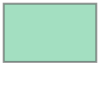

In [38]:
rn['geometry'][0][0]

In [14]:
bounds['geometry'][0].intersection(rn['geometry'][0]).area

0.0

In [67]:
def check_in(check_poly,bound_poly_df):
    bound_poly_rt=[]#to which boundary(ies) the check_poly is belonging to
    for i in range(len(bound_poly_df)):
        try:
            check=check_poly[0].intersection(bound_poly_df['geometry'][i]).area
            if check>0:
                bound_poly_rt.append([{'NAME_1':bound_poly_df['NAME_1'][i],
                                     'NAME_2':bound_poly_df['NAME_2'][i],
                                     'NAME_3':bound_poly_df['NAME_3'][i]}])
        except:
            bound_poly_rt.append('Problem!')

    return bound_poly_rt         

In [68]:
aaa=check_in(rn['geometry'][12],bounds)
aaa

[[{'NAME_1': 'Niedersachsen', 'NAME_2': 'Weser-Ems', 'NAME_3': 'Osnabrück'}],
 [{'NAME_1': 'Nordrhein-Westfalen',
   'NAME_2': 'Munster',
   'NAME_3': 'Steinfurt'}],
 [{'NAME_1': 'Nordrhein-Westfalen',
   'NAME_2': 'Munster',
   'NAME_3': 'Warendorf'}]]

In [69]:
add=[]
for i in range(10):
    #print('i = %s' % i)
    add.append([str(i), check_in(rn['geometry'][i],bounds)])
#rn['belong_to']=rn.progress_apply(lambda x: check_in(x,bounds) if x.name=='geometry' else x)
add

[['0',
  [[{'NAME_1': 'Rheinland-Pfalz',
     'NAME_2': 'Koblenz',
     'NAME_3': 'Bad Kreuznach'}],
   [{'NAME_1': 'Rheinland-Pfalz',
     'NAME_2': 'Rheinhessen-Pfalz',
     'NAME_3': 'Mainz-Bingen'}]]],
 ['1',
  [[{'NAME_1': 'Rheinland-Pfalz',
     'NAME_2': 'Koblenz',
     'NAME_3': 'Bad Kreuznach'}]]],
 ['2',
  [[{'NAME_1': 'Rheinland-Pfalz',
     'NAME_2': 'Rheinhessen-Pfalz',
     'NAME_3': 'Südliche Weinstraße'}],
   [{'NAME_1': 'Rheinland-Pfalz',
     'NAME_2': 'Rheinhessen-Pfalz',
     'NAME_3': 'Südwestpfalz'}]]],
 ['3',
  [[{'NAME_1': 'Baden-Württemberg',
     'NAME_2': 'Freiburg',
     'NAME_3': 'Ortenaukreis'}]]],
 ['4',
  [[{'NAME_1': 'Baden-Württemberg',
     'NAME_2': 'Freiburg',
     'NAME_3': 'Ortenaukreis'}]]],
 ['5',
  [[{'NAME_1': 'Baden-Württemberg',
     'NAME_2': 'Freiburg',
     'NAME_3': 'Ortenaukreis'}]]],
 ['6',
  [[{'NAME_1': 'Baden-Württemberg',
     'NAME_2': 'Freiburg',
     'NAME_3': 'Breisgau-Hochschwarzwald'}],
   [{'NAME_1': 'Baden-Württemberg',
   

In [70]:
add[0]

['0',
 [[{'NAME_1': 'Rheinland-Pfalz',
    'NAME_2': 'Koblenz',
    'NAME_3': 'Bad Kreuznach'}],
  [{'NAME_1': 'Rheinland-Pfalz',
    'NAME_2': 'Rheinhessen-Pfalz',
    'NAME_3': 'Mainz-Bingen'}]]]

In [29]:
rn_with_bounds = gpd.sjoin(rn[0:10], bounds, how="inner", op='intersects')
rn_with_bounds.head()

,id,descript,geo_unit,rn_max,geometry,index_right,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3
0,radon222_boden.1,AV192,Tertiär,29.1,"MULTIPOLYGON (((7.81099 49.93957, 7.81099 49.9...",306,86,DEU,Germany,11,Rheinland-Pfalz,29,Koblenz,307,Bad Kreuznach,None,None,Landkreise,Rural district
1,radon222_boden.2,AV194,Rotliegend,36.4,"MULTIPOLYGON (((7.81099 49.88560, 7.81099 49.9...",306,86,DEU,Germany,11,Rheinland-Pfalz,29,Koblenz,307,Bad Kreuznach,None,None,Landkreise,Rural district
0,radon222_boden.1,AV192,Tertiär,29.1,"MULTIPOLYGON (((7.81099 49.93957, 7.81099 49.9...",325,86,DEU,Germany,11,Rheinland-Pfalz,30,Rheinhessen-Pfalz,326,Mainz-Bingen,None,None,Landkreise,Rural district
2,radon222_boden.3,AV218,Buntsandstein,22.0,"MULTIPOLYGON (((7.81099 49.23809, 7.81099 49.2...",330,86,DEU,Germany,11,Rheinland-Pfalz,30,Rheinhessen-Pfalz,331,Südliche Weinstraße,None,None,Landkreise,Rural district
2,radon222_boden.3,AV218,Buntsandstein,22.0,"MULTIPOLYGON (((7.81099 49.23809, 7.81099 49.2...",331,86,DEU,Germany,11,Rheinland-Pfalz,30,Rheinhessen-Pfalz,332,Südwestpfalz,None,None,Landkreise,Rural district


In [83]:
rn_with_bounds['NAME_1'].value_counts().index

Index(['Baden-Württemberg', 'Rheinland-Pfalz', 'Niedersachsen'], dtype='object')

In [84]:
rn_rp=rn_with_bounds.loc[rn_with_bounds['NAME_1']=='Rheinland-Pfalz']
rn_rp.head()

,id,descript,geo_unit,rn_max,geometry,index_right,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3
0,radon222_boden.1,AV192,Tertiär,29.1,"MULTIPOLYGON (((7.81099 49.93957, 7.81099 49.9...",306,86,DEU,Germany,11,Rheinland-Pfalz,29,Koblenz,307,Bad Kreuznach,None,None,Landkreise,Rural district
1,radon222_boden.2,AV194,Rotliegend,36.4,"MULTIPOLYGON (((7.81099 49.88560, 7.81099 49.9...",306,86,DEU,Germany,11,Rheinland-Pfalz,29,Koblenz,307,Bad Kreuznach,None,None,Landkreise,Rural district
0,radon222_boden.1,AV192,Tertiär,29.1,"MULTIPOLYGON (((7.81099 49.93957, 7.81099 49.9...",325,86,DEU,Germany,11,Rheinland-Pfalz,30,Rheinhessen-Pfalz,326,Mainz-Bingen,None,None,Landkreise,Rural district
2,radon222_boden.3,AV218,Buntsandstein,22.0,"MULTIPOLYGON (((7.81099 49.23809, 7.81099 49.2...",330,86,DEU,Germany,11,Rheinland-Pfalz,30,Rheinhessen-Pfalz,331,Südliche Weinstraße,None,None,Landkreise,Rural district
2,radon222_boden.3,AV218,Buntsandstein,22.0,"MULTIPOLYGON (((7.81099 49.23809, 7.81099 49.2...",331,86,DEU,Germany,11,Rheinland-Pfalz,30,Rheinhessen-Pfalz,332,Südwestpfalz,None,None,Landkreise,Rural district


In [71]:
in1=pd.DataFrame(add,columns=['idx','lkr-data'])
in1.head()

,idx,lkr-data
0,0,"[[{'NAME_1': 'Rheinland-Pfalz', 'NAME_2': 'Kob..."
1,1,"[[{'NAME_1': 'Rheinland-Pfalz', 'NAME_2': 'Kob..."
2,2,"[[{'NAME_1': 'Rheinland-Pfalz', 'NAME_2': 'Rhe..."
3,3,"[[{'NAME_1': 'Baden-Württemberg', 'NAME_2': 'F..."
4,4,"[[{'NAME_1': 'Baden-Württemberg', 'NAME_2': 'F..."


In [81]:
in1.iloc[[0]]['lkr-data'][0]

[[{'NAME_1': 'Rheinland-Pfalz',
   'NAME_2': 'Koblenz',
   'NAME_3': 'Bad Kreuznach'}],
 [{'NAME_1': 'Rheinland-Pfalz',
   'NAME_2': 'Rheinhessen-Pfalz',
   'NAME_3': 'Mainz-Bingen'}]]

In [20]:
rn['belong_to']=rn['geometry'].progress_apply(check_in,args=(bounds))

ValueError: The truth value of a GeoDataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [96]:
len(rn[0:1000])

1000

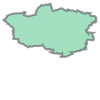

In [47]:
test.geometry[0]

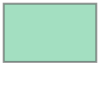

In [68]:
x=pd.DataFrame(rn.iloc[0]).T.geometry[0]
x

In [78]:
test.geometry[0].intersection(pd.DataFrame(rn.iloc[0]).T.geometry).area

AttributeError: 'Series' object has no attribute '_geom'

In [76]:
print(x.intersects(test.geometry))

AttributeError: 'array.array' object has no attribute 'intersects'